In [1]:
from astropy.io import fits
from astropy.table import Table
import astropy.table as table

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D


from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.utils.data import get_pkg_data_filename

from astropy.coordinates import SkyCoord
%matplotlib inline

import string

In [2]:
filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)

gaiaHDU = fits.open('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/gaiadr2_OrionTables.fits')
gTab=Table(gaiaHDU[1].data)

gaiaConfHDU = fits.open('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\conf_in_gaiadr2_oriontables.fits')
gaiaConfTab = Table(gaiaConfHDU[1].data)
gConf = gaiaConfTab[np.where(gaiaConfTab['source_id']>0)[0]]
Mg_all = np.array([G + 5 - 5*(np.log10(1000/p)) for G, p in zip(gaiaConfTab['phot_g_mean_mag'], gaiaConfTab['parallax'])])
ii=[]
for i in range(len(gaiaConfTab)):
    if( (Mg_all[i]<2.46*(gaiaConfTab['bp_rp'][i])+2.76 and .3<(gaiaConfTab['bp_rp'][i])<1.8)
       or (Mg_all[i]<2.8*(gaiaConfTab['bp_rp'][i])+2.16 and 1.8<(gaiaConfTab['bp_rp'][i]))):
        ii.append(i)
gaiaConfTab = gaiaConfTab[ii]

confTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/oriona-allmembers.fits')

wTrap = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wTrap.fits')
wOB = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wOB.fits')
wOther = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wElse.fits')


OBTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/ob_ori.fits')


thOriA = SkyCoord('5h35m15.8290940s','-05d23m14.153141s', frame = 'icrs')
thOriB = SkyCoord('05h35m16.112s','-05d23 m06.89s', frame = 'icrs')
thOriC = SkyCoord('05h35m16.46375s', '-05d23m22.8486s', frame = 'icrs')
thOriD = SkyCoord('05h35m17.19248s', '-05d23m15.5661s', frame = 'icrs')
traptab = Table([[thOriA.ra.deg,thOriB.ra.deg, thOriC.ra.deg, thOriD.ra.deg],
                [thOriA.dec.deg, thOriB.dec.deg,thOriC.dec.deg, thOriD.dec.deg],
                [1.81,-.9,-4.13,-7.11],[-1.62,.1,6.82,8.29]],
               names =('ra','dec','pmra','pmdec'))

[   4   72  107  178  381  432  457  517  528  531  666  758  856  939
 1143 1195 1217 1338 1448 1453 1470 1648 1796 1813 1901 1941 1947 1948
 1969 1971 2018 2094 2095 2108 2211 2237 2269 2349 2370 2384 2389 2407
 2435 2464 2508 2517 2534 2580 2586 2610 2632 2649 2712 2824 2872 2889
 2902 2905 2918 2937 2957]
26
35


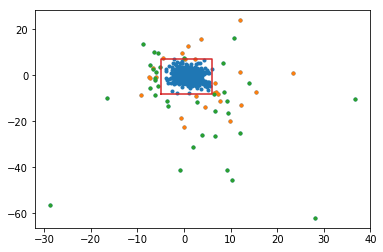

In [3]:
xfilt = np.where((gConf['pmra'] < 6) & (gConf['pmra'] > -5))[0]
yfilt = np.where((gConf['pmdec'] < 7) & (gConf['pmdec'] > -8))[0]
filt = np.intersect1d(xfilt, yfilt)
loosemask = np.arange(len(gConf))
loosemask = np.delete(loosemask, filt)
print(loosemask)

loosemaskI = loosemask[np.where(np.isin(loosemask,ii))[0]]
loosemaskII = loosemask[np.where(np.isin(loosemask,ii)==False)[0]]

print(len(loosemaskI))
print(len(loosemaskII))

plt.plot(gConf['pmra'],gConf['pmdec'], '.')
plt.plot(gConf['pmra'][loosemaskI],gConf['pmdec'][loosemaskI], '.')
plt.plot(gConf['pmra'][loosemaskII],gConf['pmdec'][loosemaskII], '.')


plt.plot([-5,-5, 6, 6, -5],[-8,7,7,-8, -8])
plt.show()


In [8]:
fastTab = gConf[loosemask]
fastTabI = gConf[loosemaskI]
fastTabII = gConf[loosemaskII]
fastTabII.write('c:/users/sahal/desktop/contam.fits', overwrite = True)

In [33]:
params = {
    'axes.titlesize' : 24,
    'axes.labelsize' : 20,
    #lines.linewidth : 3,
    #lines.markersize : 10,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    
    'xtick.direction' : 'in',
    'xtick.major.size' : 4,
    'xtick.major.width' : 0.5,
    'xtick.minor.size' : 2,
    'xtick.minor.width' : 0.5,
    'xtick.minor.visible' :   True,
    'xtick.top' : True,

    # Set y axis
    'ytick.direction' : 'in',
    'ytick.major.size' : 4,
    'ytick.major.width' : 0.5,
    'ytick.minor.size' : 2,
    'ytick.minor.width' : 0.5,
    'ytick.minor.visible' :   True,
    'ytick.right' : True#,
   }
matplotlib.rcParams.update(params)

def vibrant():
    global blue
    blue = '#0077BB'
    global cyan
    cyan = '#33BBEE'
    global teal
    teal = '#009988'
    global orange
    orange = '#EE7733'
    global red
    red = '#CC3311'
    global magenta
    magenta = '#EE3377'
    global grey
    grey = '#BBBBBB'
vibrant()

from matplotlib import path
def contains(verts, xpoints, ypoints):
    p = path.Path(verts)
    bools = p.contains_points(np.array([xpoints, ypoints]).T)
    return bools

params = {
    'axes.titlesize' : 30,
    'axes.labelsize' : 50,
#     lines.linewidth : 6,
    #lines.markersize : 10,
    'xtick.labelsize' : 40,
    'ytick.labelsize' : 40
    
#     'figure.figsize' : 40, 40
   }
matplotlib.rcParams.update(params)

def transf(ra, dec):
    pos = np.array([ra, dec])
    mat = np.array([[1/-0.000339385442203,0.0],[0.0, 1/0.000339385442203]])
    crval = np.array([83.4643019345, -3.87517570367])
    vec = +pos -crval
    crpix = np.array([2850.0,  7809.0])

    return(np.matmul(mat, vec)+crpix)

def dist(xx1, yy1, xx2, yy2):
    return np.sqrt((xx2-xx1)**2+(yy2-yy1)**2)

def box(coord, mult = 1.5):
    bRa=coord[0].ra
    pRa=coord[1].ra
    bDec = coord[0].dec
    pDec = coord[1].dec
    
    bRa = float(bRa.to_string(decimal = True))
    pRa = float(pRa.to_string(decimal = True))
    bDec = float(bDec.to_string(decimal = True))
    pDec = float(pDec.to_string(decimal = True))
    
    midRa, midDec = ((bRa+pRa)/2, (bDec+pDec)/2)

    
    constraint = np.max([dist(bRa,bDec, midRa, midDec),dist(pRa,pDec, midRa,midDec)])*mult

    lows = transf(midRa+constraint, midDec - constraint)#I THINK this should be +, -; not -, +; for the RA specifically
    highs = transf(midRa-constraint, midDec + constraint)
    
    xx = (lows[0], highs[0])
    yy = (lows[1], highs[1])

    return (xx, yy)

In [60]:
k=8
fig = plt.figure(figsize=(80,112))

def conePlotOther(inTab, ra_stat=False, dec_stat=False, offsetMultiplier = 5,tmult = np.ones(35), numplots = (7, 5)):
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])
    #gets the average proper motion of all stars confirmed and with gaia data too
    
    pmra_corr = -(inTab['pmra']-pmraAvg)*cvt
    pmdec_corr = -(inTab['pmdec']-pmdecAvg)*cvt
    
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - inTab['pmra_error']*cvt #the error is in mas so I DO convert to degrees
    maxPmdec = absPmdec + inTab['pmdec_error']*cvt

    minPmra = absPmra + inTab['pmra_error']*cvt
    minPmdec = absPmdec - inTab['pmdec_error']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec   
    
    raUpOffset = inTab['ra_1'] - offsetMultiplier * arc * signPmra
    decUpOffset = inTab['dec_1'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = inTab['ra_1'] + offsetMultiplier * arc * signPmra
    decDownOffset = inTab['dec_1'] - offsetMultiplier * arc * signPmdec
    
    tt = 1000000#myr timestep
    tt = tt * tmult
    #tt = d / pmMag

    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec    
        
    Ura = np.zeros(2*len(inTab))
    Ura[0::2]=raUpOffset
    Ura[1::2]=projRaUp
    Dra = np.zeros(2*len(inTab))
    Dra[0::2]=raDownOffset
    Dra[1::2]=projRaDown

    Udec = np.zeros(2*len(inTab))
    Udec[0::2]=decUpOffset
    Udec[1::2]=projDecUp
    Ddec = np.zeros(2*len(inTab))
    Ddec[0::2]=decDownOffset
    Ddec[1::2]=projDecDown
    
    #These are organized where all even indices are base
    #all odd indices are projected back
    UP = SkyCoord(Ura, Udec, unit = 'deg', frame = 'icrs')
    DOWN = SkyCoord(Dra, Ddec,unit = 'deg', frame = 'icrs')
    
        #make a box/cap
    RAcap = np.zeros(5 * len(inTab))
    RAcap[0::5]= projRaUp
    RAcap[1::5]= projRaUp
    RAcap[2::5] = projRaDown
    RAcap[3::5] = projRaDown
    RAcap[4::5] = RAcap[0::5]
    
    
    DECcap = np.zeros(5 * len(inTab))
    DECcap[0::5]= projDecUp
    DECcap[1::5]= projDecDown
    DECcap[2::5] = projDecDown
    DECcap[3::5] = projDecUp
    DECcap[4::5] = DECcap[0::5]

    cap = SkyCoord(RAcap, DECcap, unit = 'deg', frame = 'icrs')

    strRa = np.zeros(2 * len(inTab))
    strRa[0::2] = inTab['ra_1']
    strRa[1::2]= inTab['ra_1']-tt * inTab['pmra']*cvt
    strDec = np.zeros(2 * len(inTab))
    strDec[0::2] = inTab['dec_1']
    strDec[1::2]= inTab['dec_1']-tt*inTab['pmdec']*cvt
    straight = SkyCoord(strRa, strDec, unit = 'deg', frame = 'icrs')    

    ob = SkyCoord(OBTab['ra'], OBTab['dec'], unit = 'deg', frame = 'icrs')
    for itr in range(len(inTab)):
        anchor = 2 * itr
        off = anchor + 2    
                
        II = (*numplots, itr+1)
               
        axs = fig.add_subplot(*II, projection = wcs)
        axs.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

        xx, yy = box(straight[anchor:off], mult = 2)
        axs.set_xlim(xx)
        axs.set_ylim(yy)
        
        r=axs.coords[0]
        d=axs.coords[1]
        r.set_major_formatter('hh:mm')
        d.set_major_formatter('dd:mm')
        r.set_axislabel('', minpad=-.4)
        d.set_axislabel('', minpad=.4)
        
        capAnchor = 5 * itr
        capOff = capAnchor + 5
        
        axs.plot(ob.ra, ob.dec, 'o', transform = axs.get_transform('icrs'), color = cyan, markersize = 16)
        
        axs.plot(UP[anchor:off].ra,UP[anchor:off].dec, transform = axs.get_transform('icrs'), color = orange, linewidth = k)
        axs.plot(DOWN[anchor:off].ra, DOWN[anchor:off].dec, transform = axs.get_transform('icrs'), color = orange, linewidth = k)
        axs.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = axs.get_transform('icrs'), color =orange, linewidth=k/1.5)
        axs.plot(straight[anchor].ra, straight[anchor].dec, marker = 'o', color = 'k', transform = axs.get_transform('icrs'), markersize=16)
#         ax.set_xlim(-0.5, 3814.5)
        axs.plot(ob.ra, ob.dec, 'o', transform = axs.get_transform('icrs'), color = blue, markersize = 16)
        

#             r.set_axislabel('$\\alpha$ (J2000)', minpad=.4)
#                 d.set_axislabel('$\\delta$ (J2000)', minpad=-.4)
    
        axs.set_title(' ' + str(itr+1), loc = 'left', fontsize = 52, pad = -52, color = blue)
        
        time = tt[itr]
        axs.annotate('-'+str((round(time/1000000,3)))+'Myr', (.01,.01), xycoords = 'axes fraction', fontsize = 42, color = blue)



<Figure size 5760x8064 with 0 Axes>

In [61]:
conePlotOther(fastTabII, thOriA.ra, thOriA.dec)

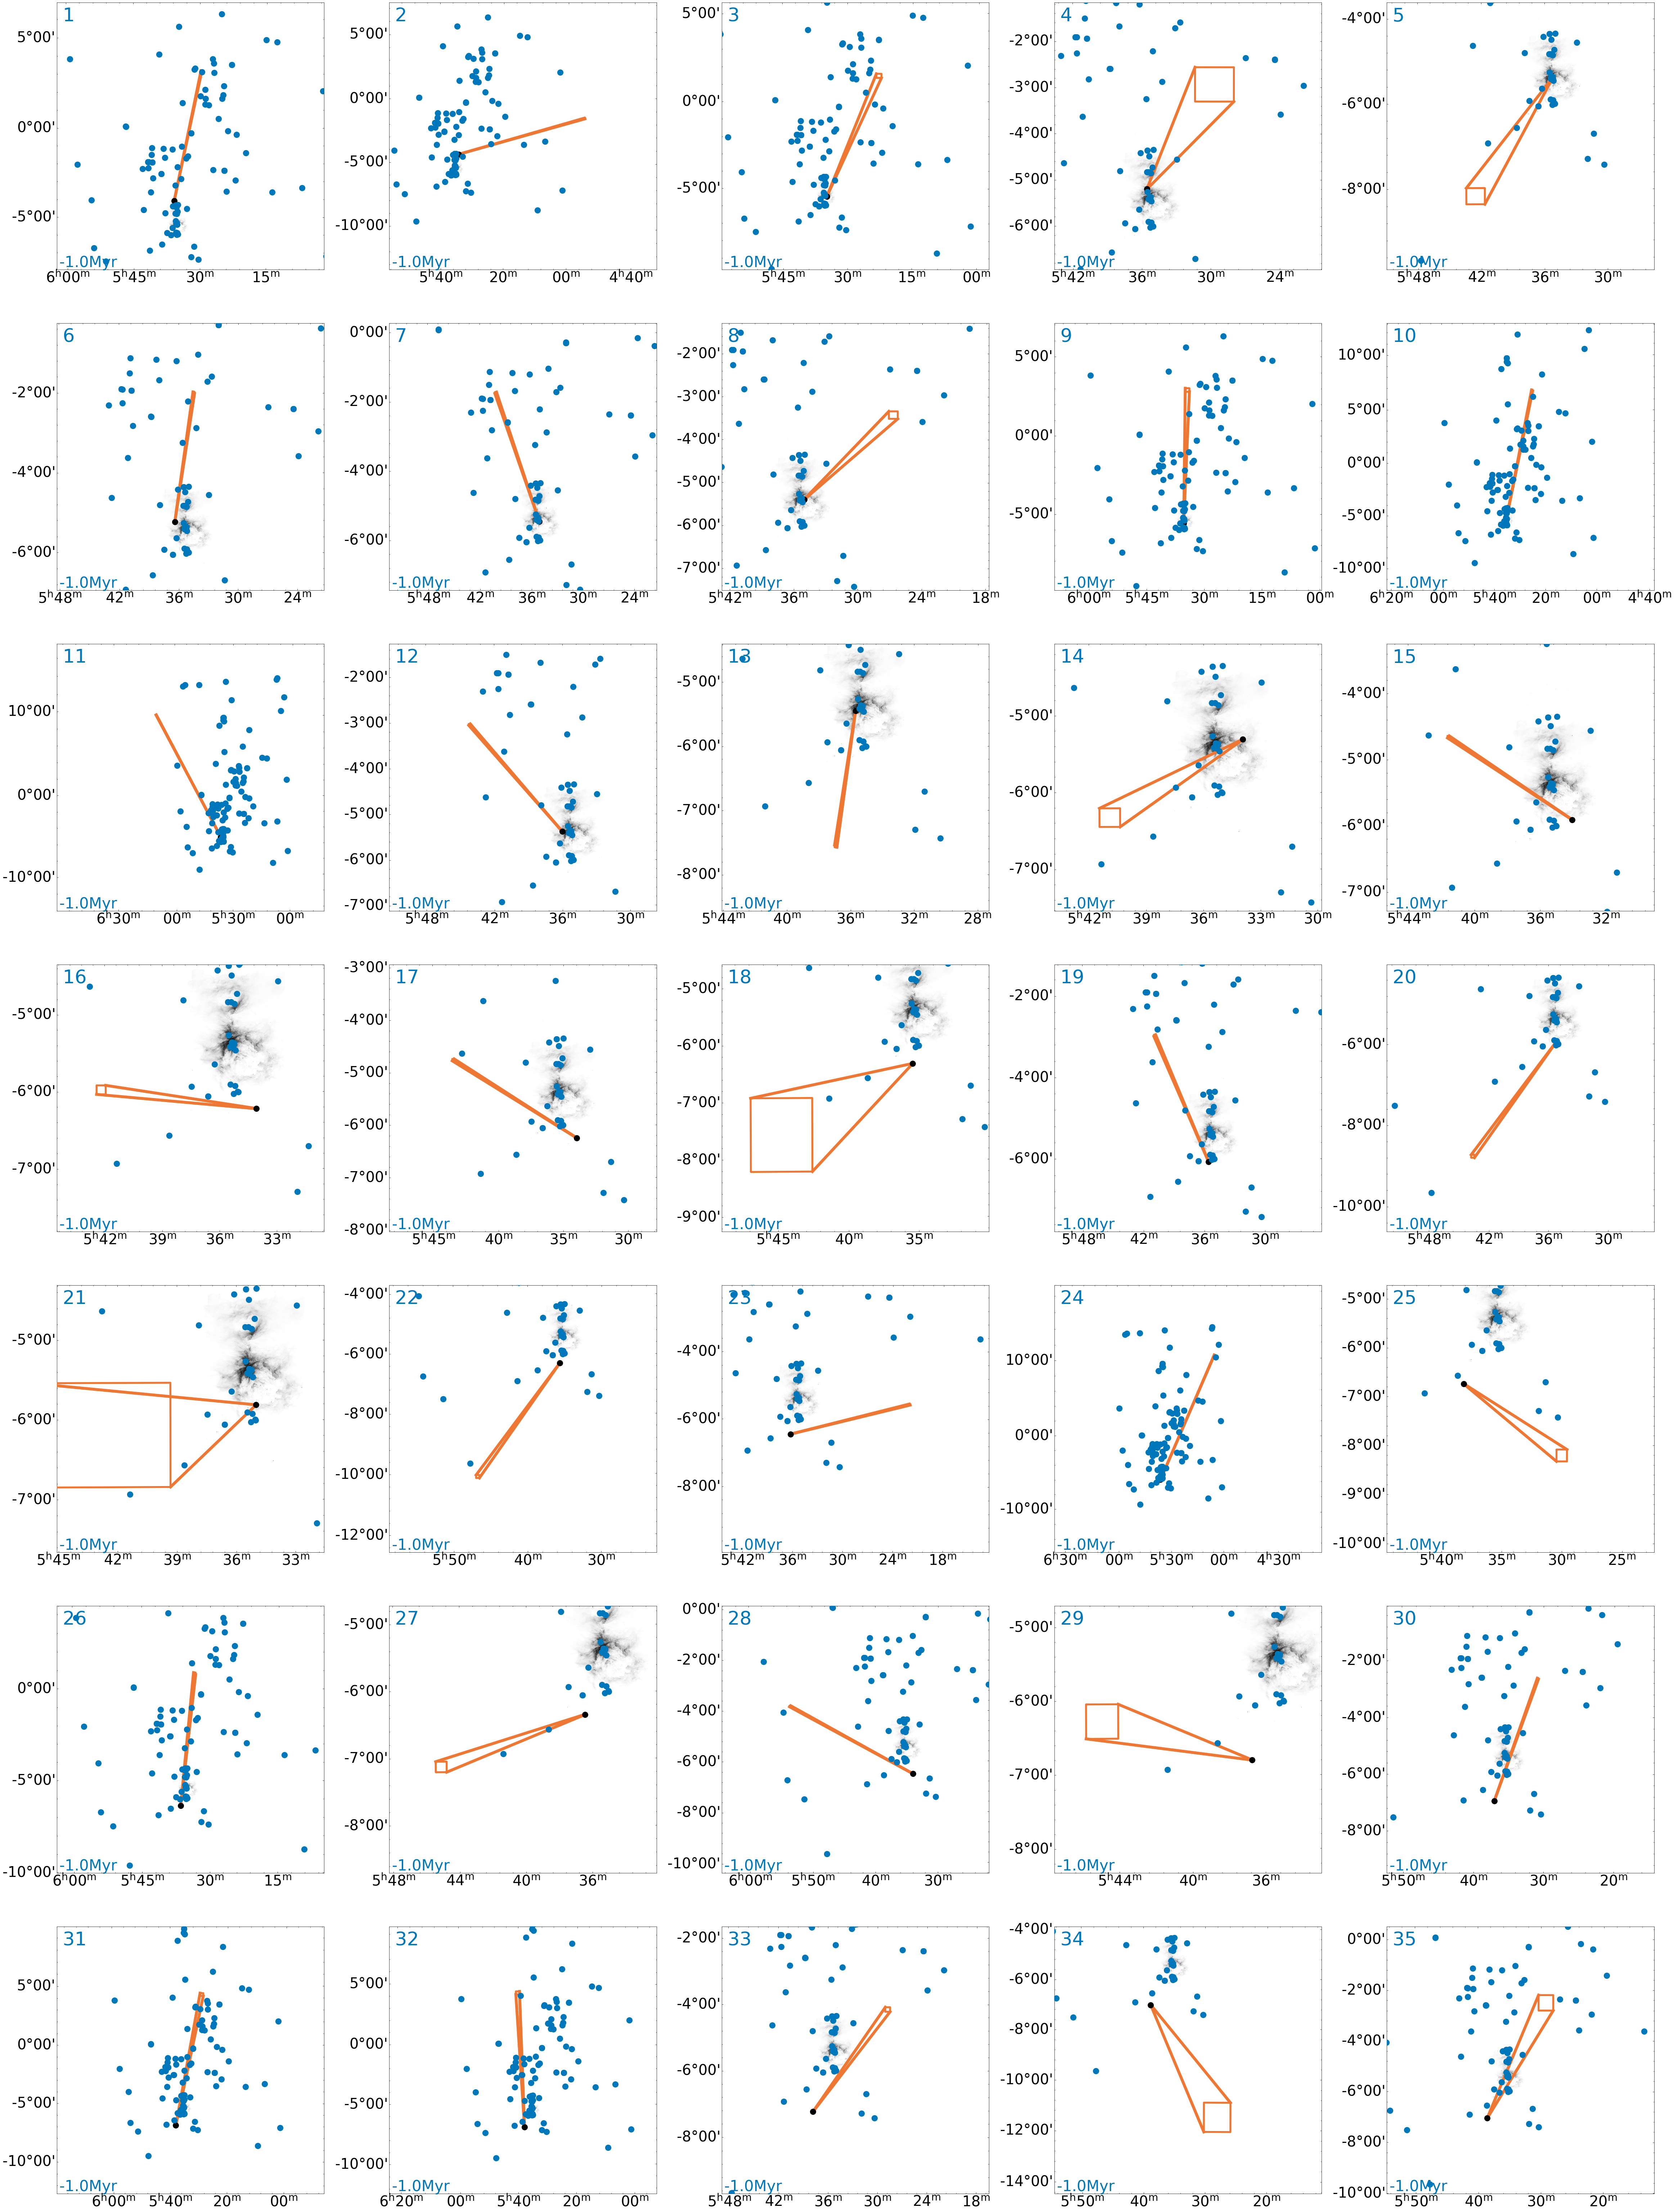

In [62]:
fig

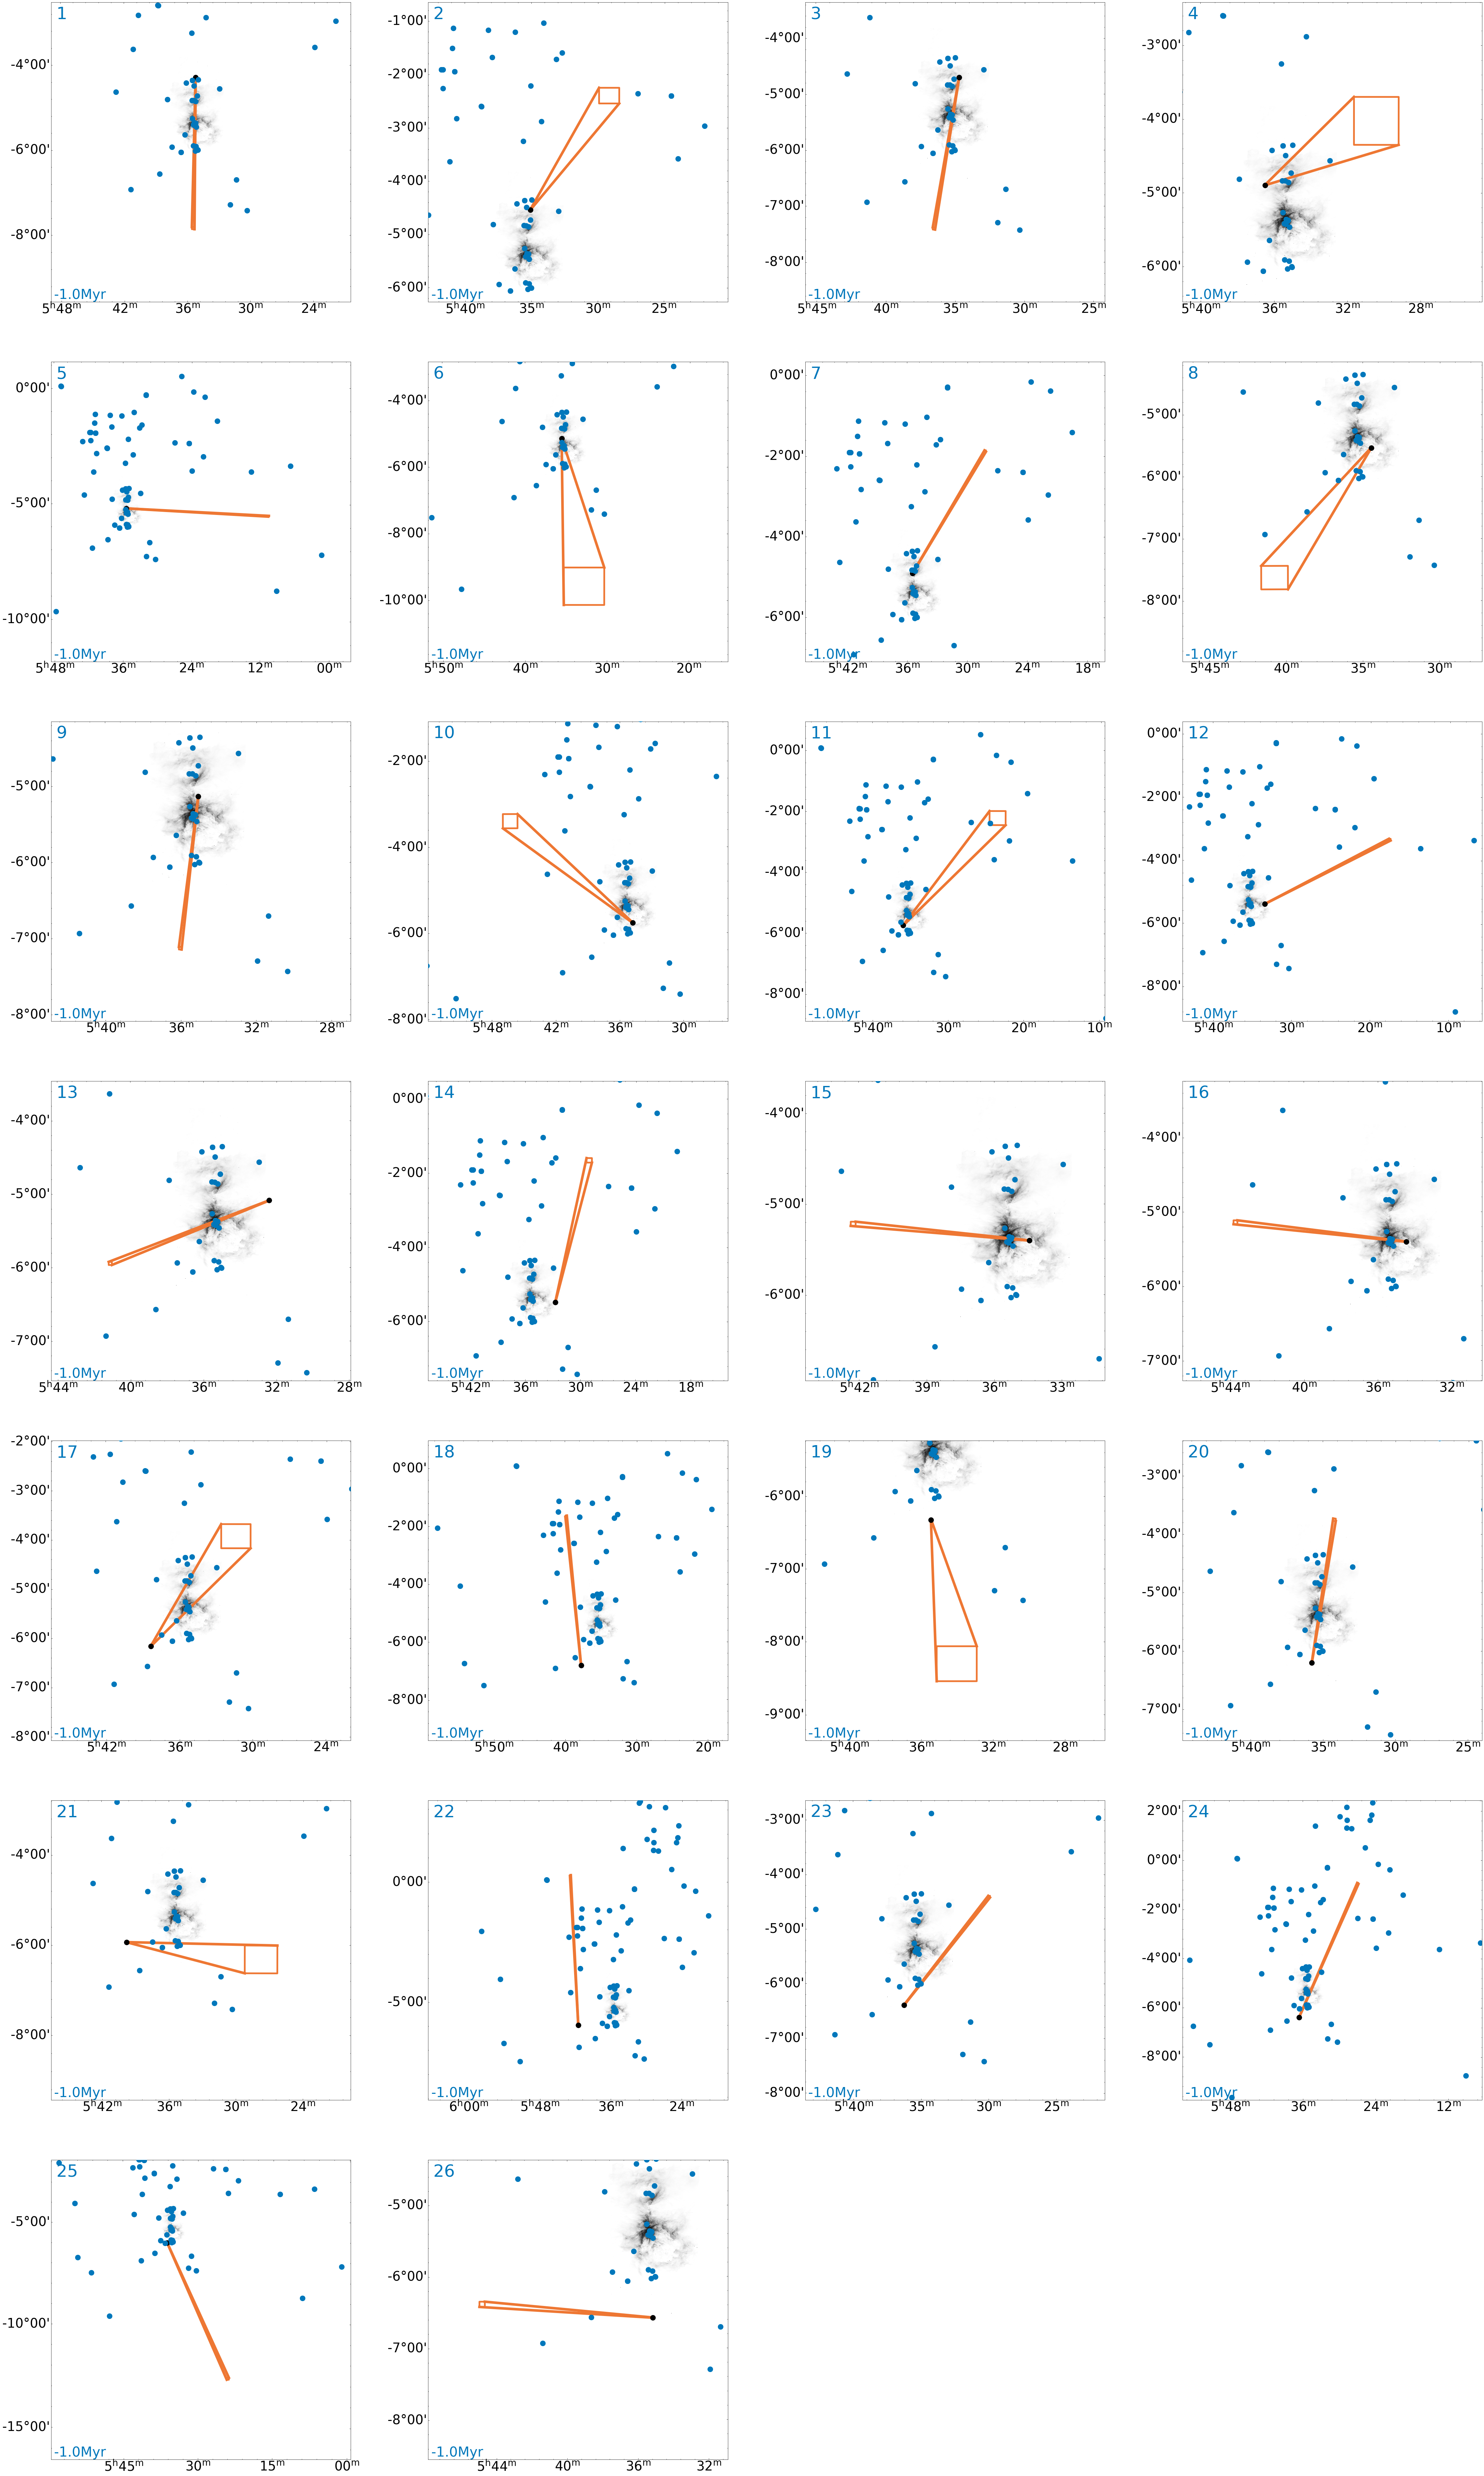

In [63]:
fig = plt.figure(figsize = (80,160))
conePlotOther(fastTabI,thOriA.ra, thOriB.ra,tmult = np.ones(len(fastTabI)), numplots = (8, 4))

In [ ]:
fig